In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.SAD)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-20 14:56:28,593 - whar-datasets - INFO - Running DownloadingStep
2026-02-20 14:56:28,593 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-20 14:56:28,594 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:56:28,594 - whar-datasets - INFO - Running ExtractingStep
2026-02-20 14:56:28,594 - whar-datasets - INFO - Checking hash for ExtractingStep
2026-02-20 14:56:28,595 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:56:28,595 - whar-datasets - INFO - Running ParsingStep
2026-02-20 14:56:28,596 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-20 14:56:28,596 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:56:28,597 - whar-datasets - INFO - Running WindowingStep
2026-02-20 14:56:28,597 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-20 14:56:28,598 - whar-datasets - INFO - Hash is up to date
2026-02-20 14:56:28,598 - whar-datasets - INFO - Loading windowing
2026-02-20 14:56:28,607 - whar-datasets - INFO - ac

In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 7006 1751 973
subject_1 7006 1751 973
subject_2 7006 1751 973
subject_3 7006 1751 973
subject_4 7006 1751 973
subject_5 7006 1751 973
subject_6 7006 1751 973
subject_7 7006 1751 973
subject_8 7006 1751 973
subject_9 7006 1751 973


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-20 14:56:28,635 - whar-datasets - INFO - Running SamplingStep
2026-02-20 14:56:28,635 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-20 14:56:28,636 - whar-datasets - INFO - Hash is not up to date
2026-02-20 14:56:30,214 - whar-datasets - INFO - Computing samples
2026-02-20 14:56:30,215 - whar-datasets - INFO - Getting normalization parameters
2026-02-20 14:56:30,697 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 8.42 ss


2026-02-20 14:56:39,608 - whar-datasets - INFO - Saving samples
2026-02-20 14:56:39,865 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

9730


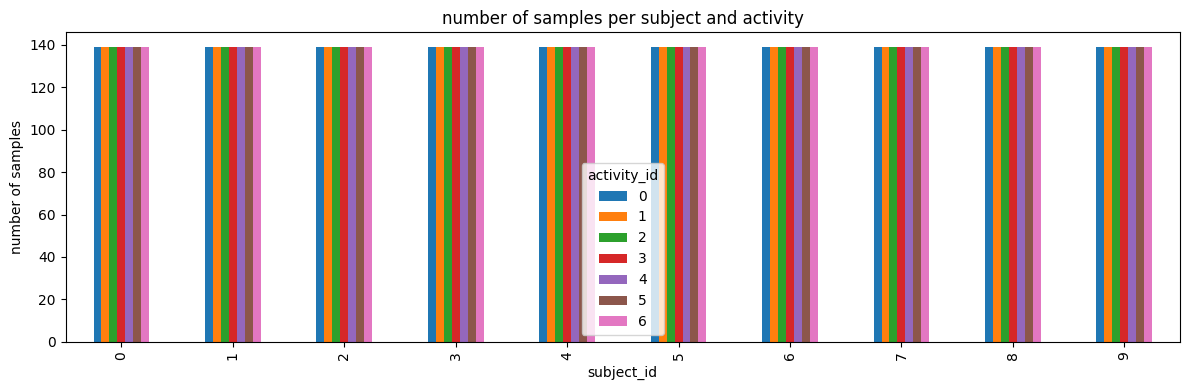

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 4, Subject: 1')

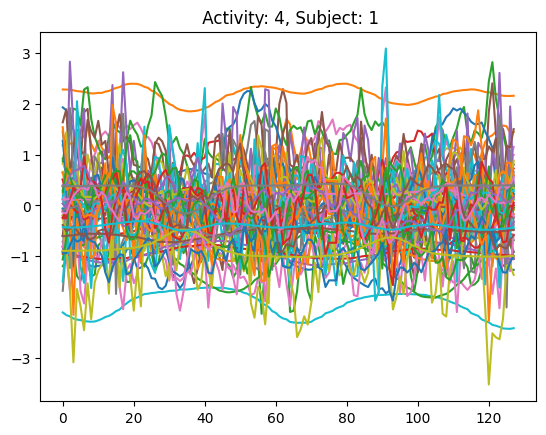

In [31]:
subject_id = None
activity_id = None

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")